In [1]:
import os
from PIL import Image
import pandas as pd
import random
os.getcwd()

'/homes/gws/jpgard/dro/notebooks'

In [2]:
fp = "/homes/gws/jpgard/dro/embeddings/embedding.csv"
embeddings = pd.read_csv(fp, index_col=0)
print(embeddings.shape)
embeddings.head()

(26602, 512)


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
/projects/grail/jpgard/vggface2/annotated_cropped/train/n004702/0336_01.jpg,0.004728,0.078321,0.006253,0.012793,0.017147,0.065669,0.011521,0.000000,0.027799,0.010053,...,0.035007,0.020402,0.019568,0.019887,0.006467,0.000170,0.001781,0.003080,0.008273,0.004085
/projects/grail/jpgard/vggface2/annotated_cropped/train/n004702/0010_01.jpg,0.012367,0.050849,0.020083,0.007959,0.005269,0.048534,0.166650,0.001140,0.054428,0.022578,...,0.057193,0.040857,0.023416,0.036503,0.001126,0.074015,0.008044,0.004651,0.018425,0.009377
/projects/grail/jpgard/vggface2/annotated_cropped/train/n004702/0395_03.jpg,0.002418,0.047873,0.011068,0.015968,0.029751,0.032805,0.053929,0.005026,0.029890,0.013636,...,0.038756,0.021963,0.007720,0.032888,0.000836,0.002767,0.003512,0.001868,0.013316,0.016131
/projects/grail/jpgard/vggface2/annotated_cropped/train/n004702/0296_01.jpg,0.007632,0.042502,0.005401,0.010275,0.020803,0.055520,0.009637,0.004585,0.043886,0.024589,...,0.034896,0.025480,0.022520,0.022385,0.001838,0.000782,0.004882,0.000974,0.008204,0.005365
/projects/grail/jpgard/vggface2/annotated_cropped/train/n004702/0419_01.jpg,0.005259,0.011542,0.016479,0.016943,0.022179,0.000817,0.027518,0.017515,0.044509,0.013850,...,0.006831,0.001596,0.013849,0.024785,0.019593,0.001076,0.037130,0.002937,0.016706,0.004080


In [3]:
# take the first image and find its most similar
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(embeddings.values)

Text(0.5, 1.0, 'Similarity Matrix of Annotated VGGFace2 Faces\nCosine Distance on VGGFace Embeddings')

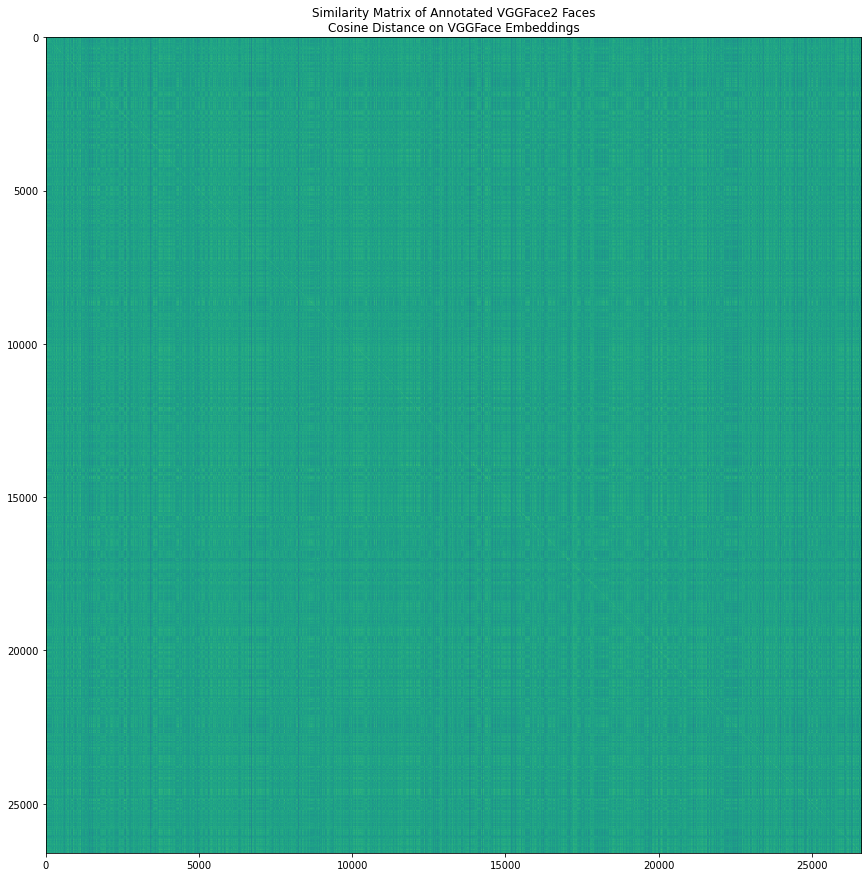

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(similarities)
plt.title("Similarity Matrix of Annotated VGGFace2 Faces\nCosine Distance on VGGFace Embeddings")

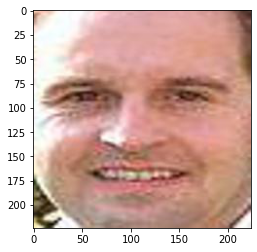

In [9]:
# random.seed(2994)
i = random.randint(0, embeddings.shape[0])
fp = embeddings.index[i]
im = Image.open(fp)
plt.imshow(im)

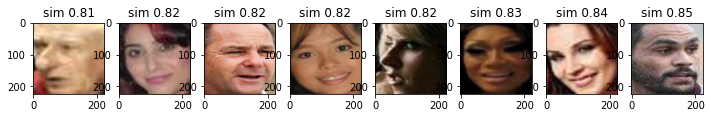

In [10]:
%matplotlib inline
k=8
# find neighbors; note that argsort sorts in ascending order, 
# so we take the last k elements (exlcluding the image itself as a neighbor)
nbrs = similarities[i,:].argsort()[-(k+1):-1]  
sims = similarities[i,nbrs]
nbrs = embeddings.index[nbrs]
fig = plt.figure(figsize=(12,12))
for count in range(1, k+1):
    ax = fig.add_subplot(1, k, count)
    fp = nbrs[count-1]
    im = Image.open(fp)
    ax.imshow(im)
    ax.set_title("sim %01.2f" % sims[count-1])

In [11]:
import umap
reducer = umap.UMAP()

In [12]:
umap_2d = reducer.fit_transform(embeddings.values)
umap_2d.shape

/homes/gws/jpgard/dro/clean-venv/lib64/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../clean-venv/lib64/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/homes/gws/jpgard/dro/clean-venv/lib64/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../clean-venv/lib64/python3.6/site-packag

(26602, 2)

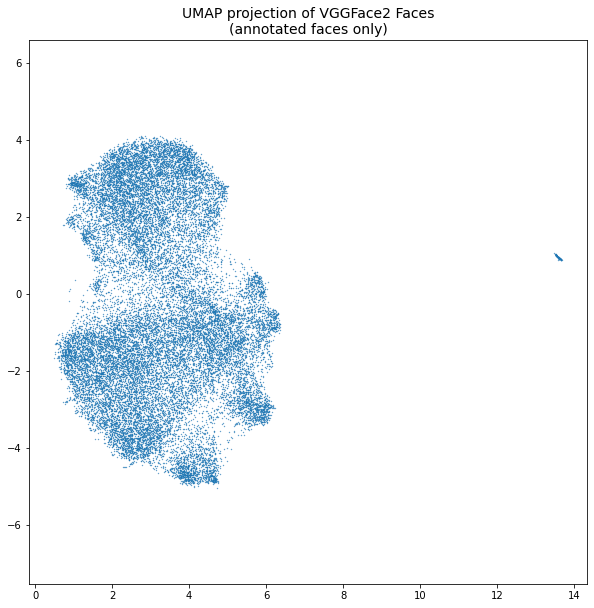

In [16]:
# TODO: plot UMAP scatter
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(umap_2d[:, 0], umap_2d[:, 1], s=0.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of VGGFace2 Faces\n(annotated faces only)', fontsize=14);

In [ ]:
# eig_vals, eig_vecs = np.linalg.eig(similarities)

In [18]:
import numpy as np
from dppy.finite_dpps import FiniteDPP
rng = np.random.RandomState(1)
DPP = FiniteDPP(kernel_type='correlation', K=similarities)

In [19]:
#TODO(jpgard): try running this!
rng = np.random.RandomState(1)
for _ in range(5):
    DPP.sample_exact_k_dpp(size=4, random_state=rng)

ValueError: array with entries not all in [0,1]

In [ ]:
print(DPP.list_of_samples)